In [28]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle

In [29]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
sr = 30000

In [30]:
path = '/auto/data2/eTheremin/BURRATA/BURRATA/BURRATA_20240426_SESSION_00/'

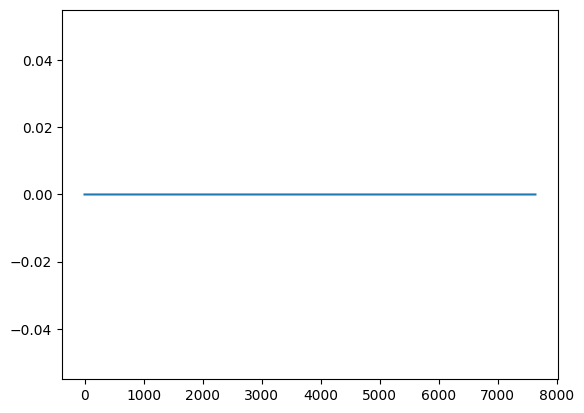

In [31]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)
plt.plot(tt['condition'])

In [32]:
data = np.load(path+'headstage_1/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_1/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_1/good_clusters.npy', allow_pickle=True)
#gc = np.arange(32)

In [33]:
gc

array([25, 27, 20, 28, 26,  6, 19,  5, 30])

In [22]:
features

array([{'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 1490.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 1490.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 1490.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False}],
      dtype=object)

In [34]:
tracking = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
#tracking = get_psth_in_block(data, features, t_pre, t_post, bin_width, gc, 1, 'tracking')

In [35]:
n = int(len(tracking[0])/4)
tracking = np.array(tracking)
first_tr = tracking[:,:n]
second_tr = tracking[:,n:2*n]
third_tr = tracking[:,2*n:3*n]
fourth_tr = tracking[:,3*n:]

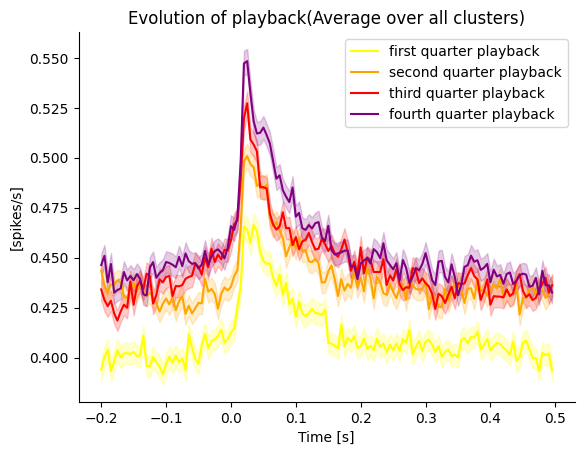

In [36]:
# la moyenne sur tous les clusters divisé en 4 
c_tracking = np.nanmean(first_tr, axis=0)
cc_tracking = np.nanmean(second_tr, axis=0)
ccc_tracking = np.nanmean(third_tr, axis=0)
cccc_tracking = np.nanmean(fourth_tr, axis=0)

m_tracking = np.nanmean(c_tracking, axis=0)
mm_tracking = np.nanmean(cc_tracking, axis=0)
mmm_tracking = np.nanmean(ccc_tracking, axis=0)
mmmm_tracking = np.nanmean(cccc_tracking, axis=0)

sem_tr = get_sem(c_tracking)
sem_pb = get_sem(cc_tracking)
sem_ccc = get_sem(ccc_tracking)
sem_cccc = get_sem(cccc_tracking)


plt.plot(psth_bins, m_tracking, c = 'yellow', label = 'first quarter playback')
plt.plot(psth_bins, mm_tracking, c = 'orange',  label = 'second quarter playback')
plt.plot(psth_bins, mmm_tracking, c = 'red',  label = 'third quarter playback')
plt.plot(psth_bins, mmmm_tracking, c = 'purple',  label = 'fourth quarter playback')

plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='yellow', alpha=0.2)
plt.fill_between(psth_bins, mm_tracking - sem_pb, mm_tracking + sem_pb, color='orange', alpha=0.2)
plt.fill_between(psth_bins, mmm_tracking - sem_ccc, mmm_tracking + sem_ccc, color='red', alpha=0.2)
plt.fill_between(psth_bins, mmmm_tracking - sem_cccc, mmmm_tracking + sem_cccc, color='purple', alpha=0.2)
plt.title('Evolution of playback(Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
#plt.ylim(0.2, 1.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

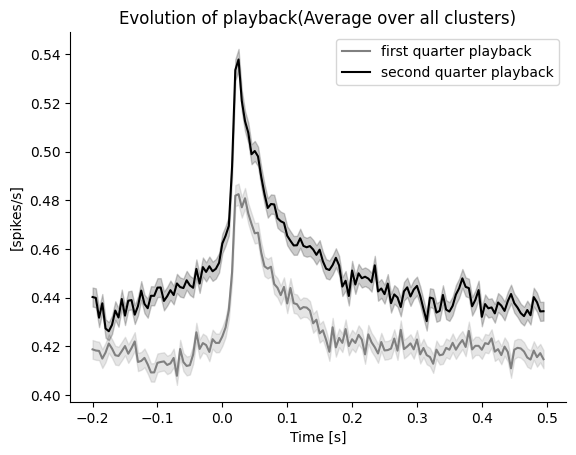

In [26]:
m = int(len(tracking[0])/2)
playback = np.array(tracking)
first_pb = playback[:,:m]
second_pb = tracking[:,m:]

c_tracking = np.nanmean(first_pb, axis=0)
cc_tracking = np.nanmean(second_pb, axis=0)


m_tracking = np.nanmean(c_tracking, axis=0)
mm_tracking = np.nanmean(cc_tracking, axis=0)


sem_tr = get_sem(c_tracking)
sem_pb = get_sem(cc_tracking)



plt.plot(psth_bins, m_tracking, c = 'grey', label = 'first quarter playback')
plt.plot(psth_bins, mm_tracking, c = 'black',  label = 'second quarter playback')

plt.fill_between(psth_bins, m_tracking - sem_tr, m_tracking + sem_tr, color='grey', alpha=0.2)
plt.fill_between(psth_bins, mm_tracking - sem_pb, mm_tracking + sem_pb, color='black', alpha=0.2)

plt.title('Evolution of playback(Average over all clusters)')
plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
#plt.ylim(0.2, 1.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()


32


IndexError: index 9 is out of bounds for axis 0 with size 9

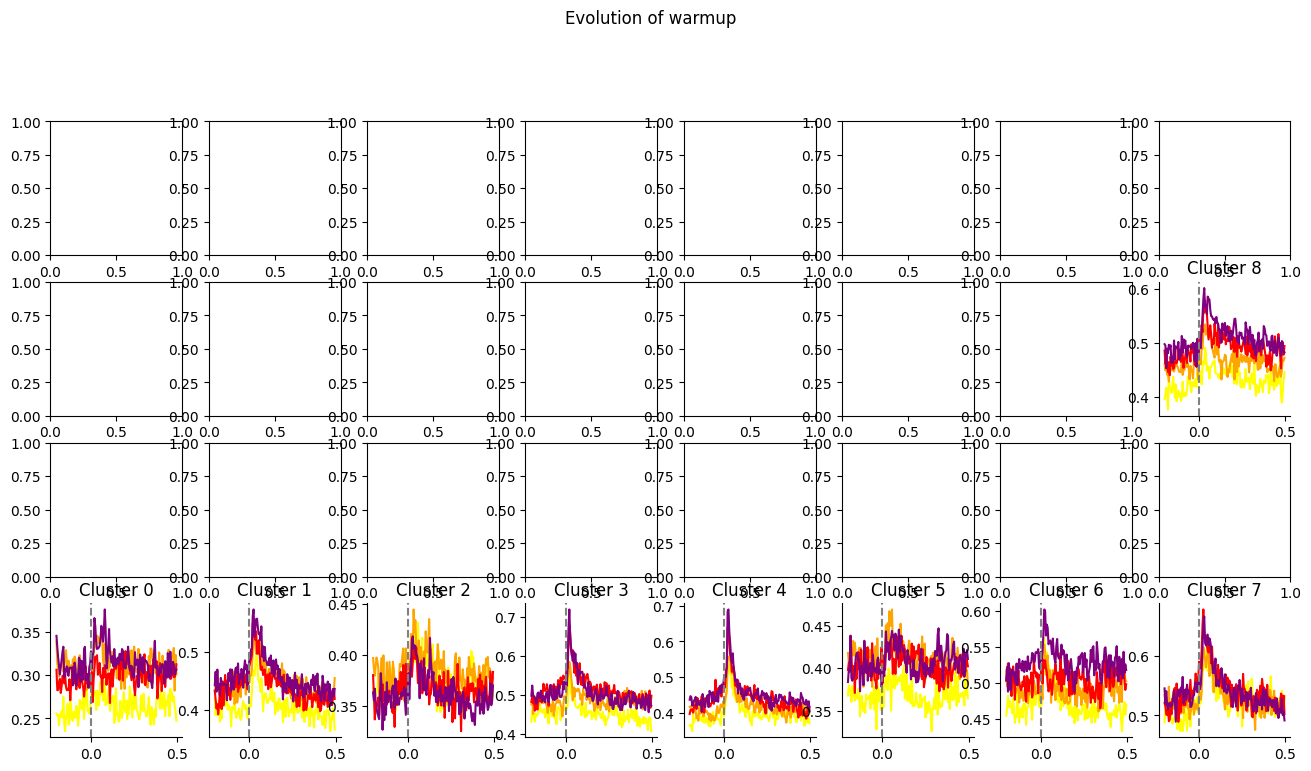

In [27]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Evolution of warmup', y=1.02)
plt.subplots_adjust() 
num_plots, num_rows, num_columns = get_better_plot_geometry(np.arange(32))
print(num_plots)
psth_bins = np.arange(-t_pre, t_post, bin_width)
for cluster in np.arange(32):
    if cluster <num_plots: 
        row, col = get_plot_coords(cluster)
        axes[row, col].plot(psth_bins, np.nanmean(first_tr[cluster], axis=0), c = 'yellow')
        axes[row, col].plot(psth_bins, np.nanmean(second_tr[cluster], axis=0), c = 'orange')
        axes[row, col].plot(psth_bins, np.nanmean(third_tr[cluster], axis=0), c = 'red')
        axes[row, col].plot(psth_bins, np.nanmean(fourth_tr[cluster], axis=0), c = 'purple')
        axes[row, col].axvline(0, c = 'grey', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')
        axes[row, col].spines['top'].set_visible(False)
        axes[row, col].spines['right'].set_visible(False)
#plt.savefig(path+'headstage_0/psth_cluster.png')